In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

Importing data

In [7]:
df1=pd.read_csv("./tvmarketing.csv")
df1.head()
df1.describe()

,TV,Sales
count,200.000000,200.000000
mean,147.042500,14.022500
std,85.854236,5.217457
min,0.700000,1.600000
25%,74.375000,10.375000
50%,149.750000,12.900000
75%,218.825000,17.400000
max,296.400000,27.000000


In [8]:
df1.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


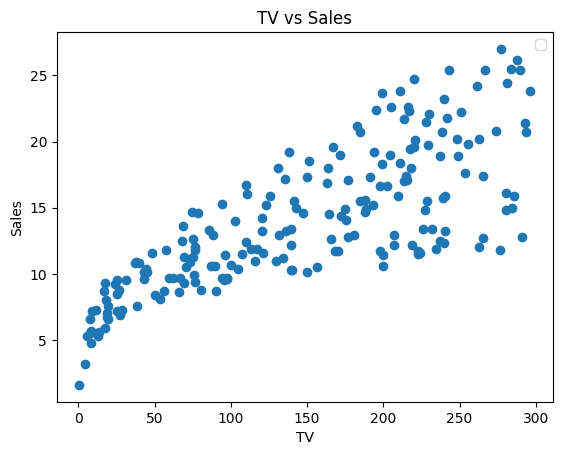

In [9]:
plt.scatter(df1["TV"],df1["Sales"])
plt.title("TV vs Sales")
plt.legend()
plt.xlabel("TV")
plt.ylabel("Sales")
plt.show()

<Axes: >

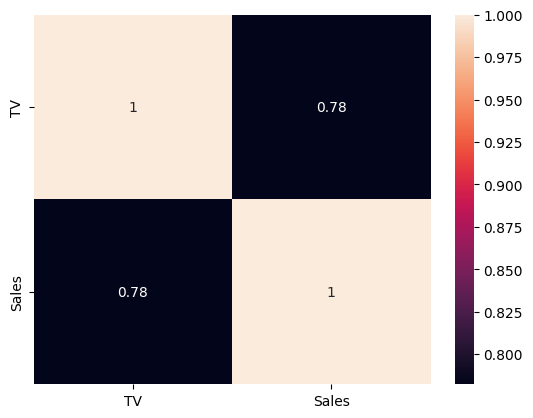

In [10]:
import seaborn as sb
data_corr=df1.corr()
sb.heatmap(data_corr,annot=True)

In [11]:
x=df1.iloc[:,:1].values
y=df1.iloc[:,1].values

In [12]:
from sklearn.model_selection import train_test_split #splitting the data into train and test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)


In [13]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(160, 1)
(40, 1)
(160,)
(40,)


In [14]:
from sklearn import linear_model
regressor=linear_model.LinearRegression()#importing linear regression model
regressor.fit(x_train,y_train)#gives best fit line for the data
#The regression coefficients are y=c+mx
print("Coefficients(m=):",regressor.coef_)#m
print("Intercept(c=):",regressor.intercept_)#c


Coefficients(m=): [0.04600779]
Intercept(c=): 7.292493773559364


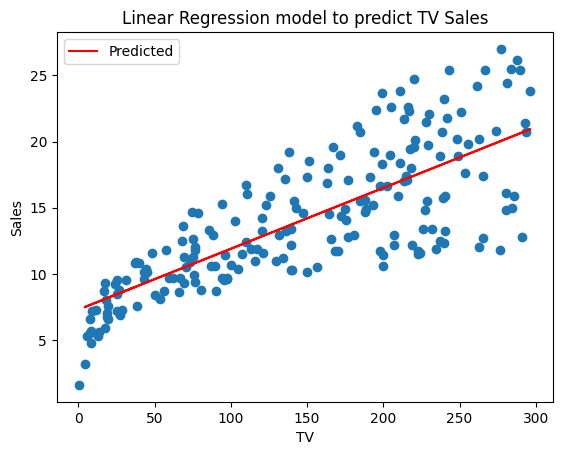

In [15]:
plt.scatter(df1["TV"],df1["Sales"])
plt.plot(x_train, regressor.coef_[0]*x_train + regressor.intercept_, '-r',label="Predicted")
plt.title("Linear Regression model to predict TV Sales")
plt.legend()
plt.xlabel("TV")
plt.ylabel("Sales")
plt.show()

In [16]:
y_pred=regressor.predict(x_test)
df=pd.DataFrame({"Actual sales":y_test,"Predicted sales":y_pred})
print(df)

    Actual sales  Predicted sales
0           11.3        10.476233
1            8.4         9.592883
2            8.7        11.451598
3           25.4        20.620950
4           11.7        15.123020
5            8.7         9.878132
6            7.2         7.692762
7           13.2        18.338964
8            9.2         8.387479
9           16.6        16.383633
10          24.2        19.314329
11          10.6        11.304373
12          10.5        14.497314
13          15.6        15.932757
14          11.8        10.807489
15          13.2        12.822630
16          17.4        19.512163
17           1.6         7.324699
18          14.7        10.729276
19          17.0        17.110556
20          26.2        20.524334
21          10.3        13.747387
22          14.9        15.348458
23          12.9        13.351720
24           8.1         9.753911
25          15.2        12.956053
26          12.6        14.911384
27          22.6        16.724091
28          11

In [17]:
from sklearn import metrics
mae=metrics.mean_absolute_error(y_test,y_pred)
mse=metrics.mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
r2_s=metrics.r2_score(y_test,y_pred)
p=1
n=200
a_r_sq = 1 - ((1 - r2_s) * (n - 1)) / (n - p - 1)
print("Mean absolute error (MAE):" ,mae)
print("Mean square error (MSE): " , mse)
print("R2-score: %.2f (RMSE):" ,r2_s )
print("adjusted R2-score: %.2f (RMSE):" ,a_r_sq )

Mean absolute error (MAE): 2.505418178966003
Mean square error (MSE):  10.18618193453022
R2-score: %.2f (RMSE): 0.6763151577939721
adjusted R2-score: %.2f (RMSE): 0.6746803858636385


In [18]:
train_score_lr = regressor.score(x_train, y_train)
test_score_lr = regressor.score(x_test, y_test)

print("The train score for linear regression model is: ", train_score_lr)
print("The test score for linear regression model is: ",test_score_lr)

The train score for linear regression model is:  0.5884742462828709
The test score for linear regression model is:  0.6763151577939721


In [19]:
x_in=int(input("Enter TV units value:"))
y_out=regressor.coef_[0]*x_in + regressor.intercept_
print("Sales Prediction using ML:",y_out)

Enter TV units value:200
Sales Prediction using ML: 16.494051694162795
